# CI HW1 Alireza Rashidi

## Importing Libs:

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Reading Dataset File:

Here using Pandas functions we read .csv file in dataframe format.


In [98]:
data_frame = pd.read_csv('/content/CRYPTOCURRENCY_COINDESK_BTCUSD_NEW.csv', thousands=',')

# data_frame = pd.read_csv('/content/CRYPTOCURRENCY_COINDESK_BTCUSD_NEW.csv')
# data_frame['Close'] = data_frame.iloc[:,1].str.replace(',', '.').astype(float)
# printing dataframe contents to insure datafreme is correct.
data_frame.head(10)   

,Date,Close
0,10/11/2020,11350
1,10/12/2020,11564
2,10/13/2020,11437
3,10/14/2020,11396
4,10/15/2020,11544
5,10/16/2020,11314
6,10/17/2020,11356
7,10/18/2020,11447
8,10/19/2020,11732
9,10/20/2020,11904


Printing some informations about given dataset:

In [99]:
print('shape of dataset: ', data_frame.shape)
print('\ncol names: ', data_frame.columns)
print('\nnumber of columns: ', len(data_frame.columns))
print('\ncolomns data types:\n', data_frame.dtypes)
print('\nmissing values:', data_frame.isnull().sum())

shape of dataset:  (366, 2)

col names:  Index(['Date', 'Close'], dtype='object')

number of columns:  2

colomns data types:
 Date     object
Close     int64
dtype: object

missing values: Date     0
Close    0
dtype: int64


### Converting date values to numerical values:

in linear regression both of inputs and output values must be numrical.

In [100]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'])
data_frame['Date_Ordinal'] = data_frame['Date'].map(dt.datetime.toordinal)
# feature_vector2 = np.arange(data_frame['Date_Ordinal'].index)
idx = data_frame['Date_Ordinal'].index
data_frame['Date_Ordinal']

0      737709
1      737710
2      737711
3      737712
4      737713
        ...  
361    738070
362    738071
363    738072
364    738073
365    738074
Name: Date_Ordinal, Length: 366, dtype: int64

### Extracting indices of records:

**Attention: this method didn't used in this HW the date to ordinal method is used in this HW (feature_vector).

In [101]:
feature_vector2 = np.arange(len(idx))
feature_vector2

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Printing some feature vector values and label values:

In [102]:
# extracting dataframe and converting to numpy array.
feature_vector = data_frame['Date_Ordinal'].to_numpy()
label_vector = data_frame['Close'].to_numpy()

# printing 5 of samples...
print('feature values: ', feature_vector[:5])
print('coresponding labels:', label_vector[:5])

feature values:  [737709 737710 737711 737712 737713]
coresponding labels: [11350 11564 11437 11396 11544]


## Data Visualization:

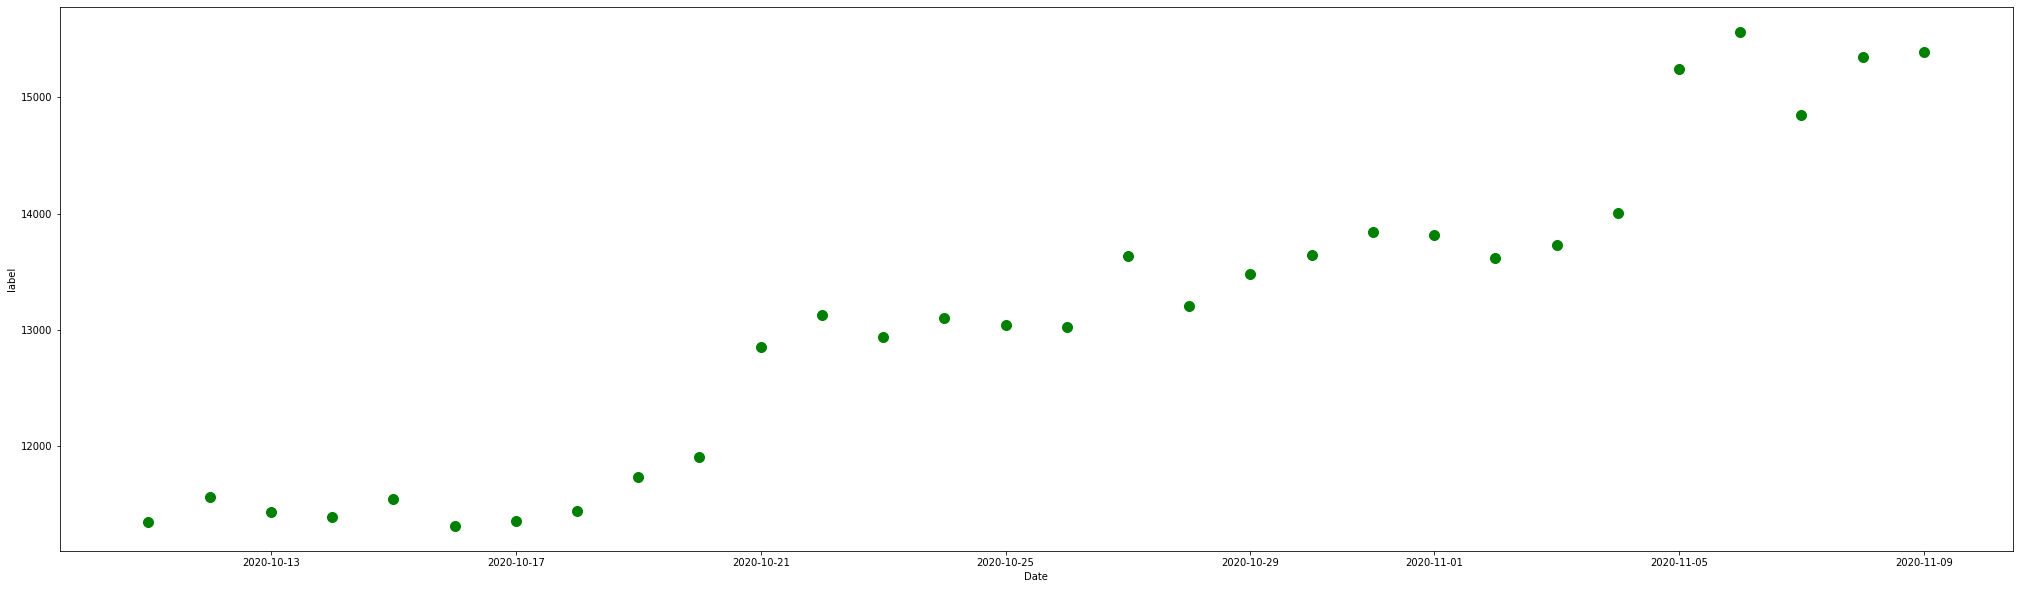

In [103]:
NUM_RECORDS = 30
area = (30 * NUM_RECORDS)**2 
plt.figure(figsize=(NUM_RECORDS+5, 10))
plt.scatter(data_frame['Date'][0:NUM_RECORDS], label_vector[0:NUM_RECORDS], s = 100 ,color='green')
plt.xlabel('Date')
plt.ylabel('label')
plt.show()

## Linear Regression:
equation: `y = a.x + b`


*   a is the coefficient that we must train it in order to use it to estimate new sampels(weight of model).

*   x is the input feature.
*   b is the bias of the model.
*   y is the output that model has been predicted.




In [104]:
def unison_shuffle(a, b):
    inx = np.random.permutation(a.shape[0])
    return a[inx], b[inx]

def convert_to_row_vector(X, y):
    new_X = X.reshape(-1, X.shape[0])
    new_y = y.reshape(-1, y.shape[0])
    return new_X, new_y

def convert_to_col_vector(X):
    return X.reshape(X.shape[0], -1)

def train_val_test_split(X, y, train_ratio=0.7, val_ratio=0.15):
    """this function returns train, val, test sets from original dataset."""
    train_split = int(X.shape[0] * train_ratio)
    step = int(X.shape[0] * val_ratio)

    return X[:train_split], y[:train_split], X[train_split: train_split + step], y[train_split: train_split + step], X[train_split + step:], y[train_split + step:]

In [105]:
# feature_vector, label_vector = unison_shuffle(feature_vector, label_vector)
# print(feature_vector[:5])
# print(label_vector[:5])

In [106]:
# feature_vector, label_vector = convert_to_row_vector(feature_vector, label_vector)
feature_vector2 = convert_to_col_vector(feature_vector2)
feature_vector = convert_to_col_vector(feature_vector)
print("feature_vector col wise vector's shape: ", feature_vector.shape)
print("label vector shape: ", label_vector.shape)

feature_vector col wise vector's shape:  (366, 1)
label vector shape:  (366,)


### Spliting data in to train, validation and test sets:

In [107]:
train_X, train_y, val_X, val_y, test_X, test_y = train_val_test_split(X=feature_vector, y=label_vector)
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(256, 1) (256,)
(54, 1) (54,)
(56, 1) (56,)


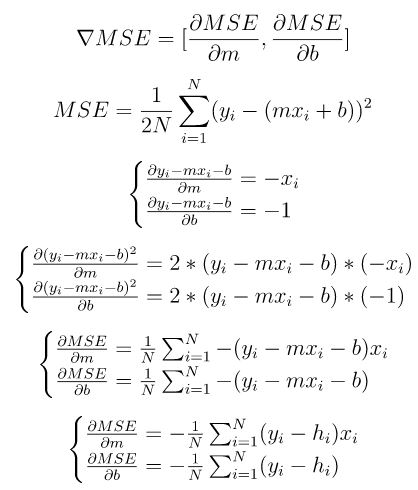

### Linear_Regression class that have some useful functions and algorithems:

In [108]:
class Linear_Regression:

     """this class is related to the Linear Regression algorithem.
        X: is the feature vector of the problem.
        y: is the set of lables of the problem.
        alpha: is the learning rate.
        iters: is the number of itrations that algorithem must go.
     """
     def __init__(self, X, y ,alpha=0.01, iters=10, log=False):

        self.alpha = alpha
        self.iters = iters
        self.X = X
        self.y = y
        self.log = log
        self.bias = 0
        self.W_values = []
        self.MSE_values = []

        # number of weight is equal to number of features.(vector of weights)
        # self.weight = np.zeros(self.X.shape[1]) 
        self.weight = np.random.random(self.X.shape[1])
        # self.weight = np.zeros((1, self.X.shape[0])  

     def train_model(self):

        """this function updates the parameters of the model (bias and weight vector)
            in other words it trains the model.
        """
        for itr in range(self.iters):

            der_w, der_bias = self.gradientDescent_vector()
            self.W_values.append(self.weight)

            # -----updating parammeters...
            self.weight = self.weight - self.alpha * der_w
            self.bias = self.bias - self.alpha * der_bias
            
            MSE = self.get_MSE_error(self.X, self.y)
            self.MSE_values.append(MSE)
            if self.log:
                print('[itration = {},  weight = {},  bias = {},  MSE error = {}]'.format(itr + 1, self.weight, self.bias, MSE))

     def predict(self, X):
        """the other name of this function is h function. """
        return np.dot(X, self.weight) + self.bias

     def get_MSE_error(self, x, y):
        y_pred = self.predict(x)
        return np.mean((y - y_pred) ** 2) / 2

     def gradientDescent_vector(self):
         """y_pred is vector of predicions per each record. shape=(num_records, )
            y is the real labels per each record. shape=(num_records, )
            this function returns gradient vector.
         """  
         y_pred = self.predict( self.X )
        #  dw = - ( 2 * ( self.X.T ).dot( self.y - y_pred )  ) / self.X.shape[0]
        #  db = - 2 * np.sum( self.y - y_pred ) / self.X.shape[0]
        #  return ((-np.dot( self.X.T , (self.y - y_pred) ) / self.X.shape[0]), -np.sum(self.y - y_pred) / self.X.shape[0])
         return -( 2 * ( self.X.T ).dot( self.y - y_pred )  ) / self.X.shape[0], - 2 * np.sum( self.y - y_pred ) / self.X.shape[0]

     def normal_equation(self):
         """
         this code calculates model's weight using normal_equation
         """
         return np.dot((np.linalg.pinv(np.dot(self.X.T , self.X))), np.dot(self.X.T ,self.y))


### Some of model's configurations and training:

In [109]:
# learning_rate = 0.0000000000001
learning_rate = 1e-13
model_1 = Linear_Regression(X=train_X, y=train_y, alpha = learning_rate, iters = 95 ,log = True)

In [110]:
model_1.train_model()

[itration = 1,  weight = [0.87712835],  bias = -1.3692039592206587e-07,  MSE error = 186213620104.0605]
[itration = 2,  weight = [0.78710328],  bias = -2.5893285076178736e-07,  MSE error = 147897114141.98874]
[itration = 3,  weight = [0.70688019],  bias = -3.676605492129677e-07,  MSE error = 117470210879.68605]
[itration = 4,  weight = [0.63539183],  bias = -4.645499427414183e-07,  MSE error = 93308392914.08292]
[itration = 5,  weight = [0.57168716],  bias = -5.508899923944769e-07,  MSE error = 74121640901.55623]
[itration = 6,  weight = [0.5149187],  bias = -6.278293164430117e-07,  MSE error = 58885558363.633316]
[itration = 7,  weight = [0.46433121],  bias = -6.963914709788815e-07,  MSE error = 46786678316.04418]
[itration = 8,  weight = [0.41925172],  bias = -7.574885667526753e-07,  MSE error = 37179031597.04013]
[itration = 9,  weight = [0.3790805],  bias = -8.11933403402788e-07,  MSE error = 29549658042.288452]
[itration = 10,  weight = [0.34328315],  bias = -8.604502825030676e-07

In [111]:
print('y = wx + b is: {}x + {}'.format(model_1.weight, model_1.bias))

y = wx + b is: [0.05032039]x + -1.2575268423685555e-06


In [112]:
print('trained weight of model: ', model_1.weight)
print('normal_equation weight value: ', model_1.normal_equation())

trained weight of model:  [0.05032039]
normal_equation weight value:  [0.05030412]


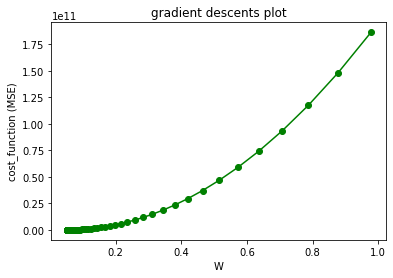

In [113]:
plt.title('gradient descents plot')
plt.xlabel('W')
plt.ylabel('cost_function (MSE)')
plt.plot(model_1.W_values, model_1.MSE_values, 'o-', color='green')
plt.show()

As we can see in this fig we have decreaseing MSE values over iterations:


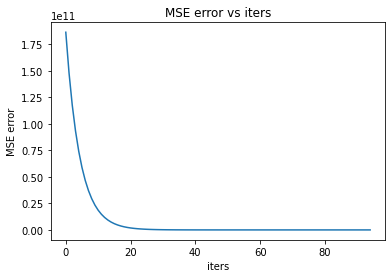

In [114]:
plt.title('MSE error vs iters')
plt.xlabel('iters')
plt.ylabel('MSE error')
plt.plot(range(model_1.iters), model_1.MSE_values)
plt.show()

In [115]:
y_pred = model_1.predict(train_X)
print('actual labels:', train_y[:5])
print('predicted labels: ', np.round(y_pred[:5]))

actual labels: [11350 11564 11437 11396 11544]
predicted labels:  [37122. 37122. 37122. 37122. 37122.]


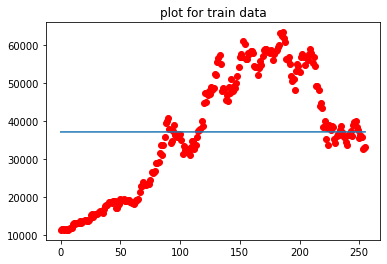

In [116]:
plt.title('plot for train data')
plt.plot(range(len(train_X)), y_pred)
plt.scatter(range(len(train_X)), train_y, color='red')
plt.show()

predicting some values using validation set:

In [117]:
y_pred = model_1.predict(val_X)
print('actual labels:', val_y[:5])
print('predicted labels: ', np.round(y_pred[:5]))

actual labels: [34857 32212 31329 32648 34721]
predicted labels:  [37135. 37135. 37135. 37135. 37135.]


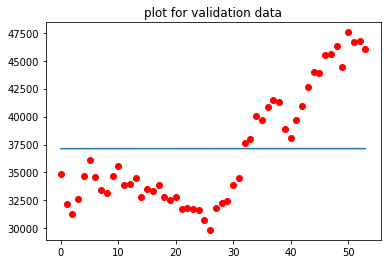

In [118]:
plt.title('plot for validation data')
plt.plot(range(len(val_X)), y_pred)
plt.scatter(range(len(val_X)), val_y, color='red')
plt.show()

Evaluation on test data:

In [119]:
y_pred_test = model_1.predict(test_X)
print('actual labels:', test_y[:5])
print('predicted labels: ', np.round(y_pred_test[:5]))

actual labels: [45017 44593 46568 48653 48988]
predicted labels:  [37137. 37137. 37138. 37138. 37138.]


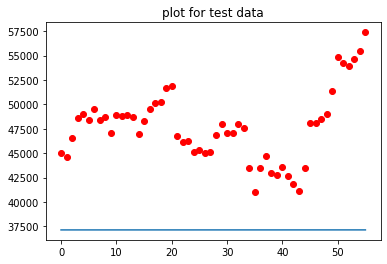

In [120]:
plt.title('plot for test data')
plt.plot(range(len(test_X)), y_pred_test)
plt.scatter(range(len(test_X)), test_y, color='red')
plt.show()

## Polynomial regression:

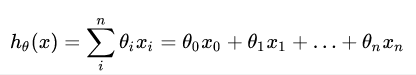


In [121]:
train_y = train_y.reshape(-1, train_X.shape[1])

In [122]:
class Polynomial_Regression:

    def __init__(self, X, y ,alpha=0.01, iters=10, degree=2, log=False):

        self.alpha = alpha
        self.iters = iters
        self.X = X
        self.y = y
        self.log = log
        self.bias = 0
        self.degree = degree
        # self.weight = np.array(np.random.random(self.degree))
        self.weight = (np.array([0.0] * self.degree)).reshape(-1, X.shape[1])

        self.MSE_values = []

    def make_polynomial(self, X, degree):
        """ this function creates polynomial from feature vector
        """
        if degree < 1:
            return 1;

        X_poly = np.copy(X) # degree 1

        for i in range(2, degree + 1):  # degree N to 1
            X_poly = np.hstack((X_poly, X ** i))

        return X_poly

    def predict(self, X):

        return np.dot(X, self.weight) + self.bias

    def train_model(self):

        X_poly = self.make_polynomial(self.X, self.degree)
        for itr in range(self.iters):
     
            der_w, der_bias = self.gradientDescent_vector(X_poly)
            
            # -----updating parammeters...
            self.weight = self.weight - self.alpha * der_w
            self.bias = self.bias - self.alpha * der_bias

            MSE = self.get_MSE_error(X_poly, self.y)
            self.MSE_values.append(MSE)

            if self.log:
                print('[itration = {},  weight = {},  bias = {},  MSE error = {}]'.format(itr + 1, self.weight, self.bias, MSE))

    def get_MSE_error(self, x, y):
        y_pred = self.predict(x)
        return np.mean((y - y_pred) ** 2) / 2

    def gradientDescent_vector(self, X):
        y_pred = self.predict( X )
        return -( 2 * ( X.T ).dot( self.y - y_pred )  ) / self.X.shape[0], - 2 * np.sum( self.y - y_pred ) / self.X.shape[0]

In [123]:
degree = 2
itrs = 500
polynomial_model = Polynomial_Regression(X=train_X, y=train_y, alpha=1e-25, log=True, iters=itrs, degree=degree)

In [124]:
polynomial_model.train_model()

[itration = 1,  weight = [[5.47713996e-15]
 [4.04136251e-09]],  bias = 7.42300703125e-21,  MSE error = 735913943.4023563]
[itration = 2,  weight = [[1.06296129e-14]
 [7.84317381e-09]],  bias = 1.4405988324858327e-20,  MSE error = 665786960.5916617]
[itration = 3,  weight = [[1.54766633e-14]
 [1.14196333e-08]],  bias = 2.0975026346439717e-20,  MSE error = 603727120.6560483]
[itration = 4,  weight = [[2.00363952e-14]
 [1.47840986e-08]],  bias = 2.715465752701514e-20,  MSE error = 548806409.989931]
[itration = 5,  weight = [[2.43258392e-14]
 [1.79491357e-08]],  bias = 3.296796390400158e-20,  MSE error = 500203570.16306794]
[itration = 6,  weight = [[2.83610167e-14]
 [2.09265656e-08]],  bias = 3.843665933019466e-20,  MSE error = 457191817.20894843]
[itration = 7,  weight = [[3.21569993e-14]
 [2.37275088e-08]],  bias = 4.358117057272555e-20,  MSE error = 419127973.6397979]
[itration = 8,  weight = [[3.57279651e-14]
 [2.63624265e-08]],  bias = 4.842071360488829e-20,  MSE error = 385442850.67

In [125]:
print(str(polynomial_model.degree)+' degree weight is: \n', polynomial_model.weight)

2 degree weight is: 
 [[9.23181903e-14]
 [6.81800389e-08]]


As we can see in this fig we have decreaseing MSE values over iterations.



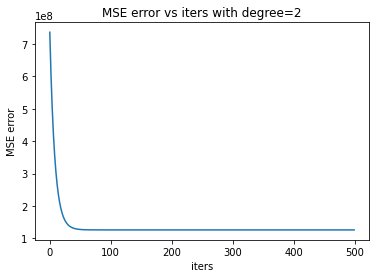

In [126]:
plt.title('MSE error vs iters with degree=' + str(polynomial_model.degree))
plt.xlabel('iters')
plt.ylabel('MSE error')
plt.plot(range(itrs), polynomial_model.MSE_values)
plt.show()

In [127]:
y_pred = polynomial_model.predict(polynomial_model.make_polynomial(train_X, degree))

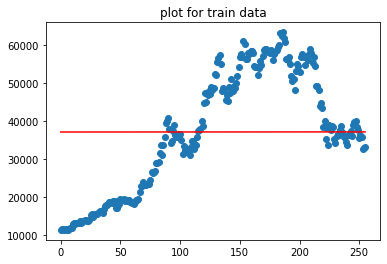

In [128]:
plt.title('plot for train data')
plt.plot(range(len(train_X)), y_pred, 'red')
plt.scatter(range(len(train_X)), train_y)
plt.show()

Evaluation on validation data:

In [129]:
y_pred = polynomial_model.predict(polynomial_model.make_polynomial(val_X, degree))
print('actual labels:', val_y[:5])
print('predicted labels: ', np.round(y_pred[:5]))

actual labels: [34857 32212 31329 32648 34721]
predicted labels:  [[37130.]
 [37130.]
 [37131.]
 [37131.]
 [37131.]]


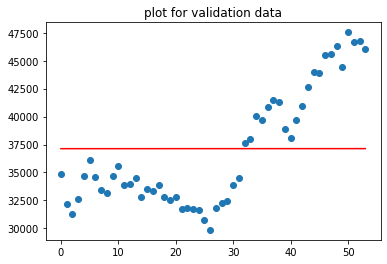

In [130]:
plt.title('plot for validation data')
plt.plot(range(len(val_X)), y_pred, 'red')
plt.scatter(range(len(val_X)), val_y)
plt.show()

Evaluation on test data:

In [131]:
y_pred = polynomial_model.predict(polynomial_model.make_polynomial(test_X, degree))
print('actual labels:', test_y[:5])
print('predicted labels: ', np.round(y_pred[:5]))

actual labels: [45017 44593 46568 48653 48988]
predicted labels:  [[37136.]
 [37136.]
 [37136.]
 [37136.]
 [37136.]]


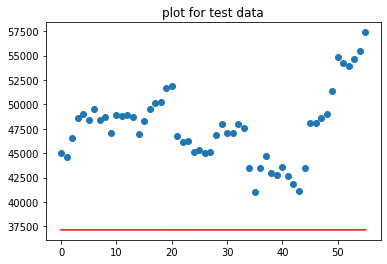

In [132]:
plt.title('plot for test data')
plt.plot(range(len(test_X)), y_pred, 'red')
plt.scatter(range(len(test_X)), test_y)
plt.show()

## Predicting on 10 Days after 10/11/2021

In [133]:
ten_data_after_X = np.arange(start=test_X[-1][0], stop=test_X[-1][0] + 10)
print('ten days after 10/11/2021 :\n', ten_data_after_X)

ten days after 10/11/2021 :
 [738074 738075 738076 738077 738078 738079 738080 738081 738082 738083]


In [134]:
ten_data_after_X = convert_to_col_vector(ten_data_after_X)
y_pred_linear = model_1.predict(ten_data_after_X)
y_pred_poly = polynomial_model.predict(polynomial_model.make_polynomial(ten_data_after_X, degree) )
print('\nlinear model prediction: \n', y_pred_linear)
print('\npolynomial model prediction: \n', y_pred_poly)


linear model prediction: 
 [37140.17260182 37140.22292221 37140.2732426  37140.32356299
 37140.37388338 37140.42420378 37140.47452417 37140.52484456
 37140.57516495 37140.62548534]

polynomial model prediction: 
 [[37141.29638017]
 [37141.39702407]
 [37141.4976681 ]
 [37141.59831227]
 [37141.69895658]
 [37141.79960102]
 [37141.9002456 ]
 [37142.00089031]
 [37142.10153516]
 [37142.20218015]]
